<a href="https://colab.research.google.com/github/ljanastas/PADP-9200-Ethics-and-Algorithms/blob/master/Problem_Set_3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [POLS 9500]: Problem Set 3 SOLUTIONS


# The data
The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors’ physical appearance. (This is aslightly modified version of the original data set that was released as part of the replication data for Data Analysis Using Regression and Multilevel/Hierarchical Models (Gelman and Hill, 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors.
  
# Predicting student ratings using random forests

For this problem set we will be training a random forest model to predict student ratings of 'very good' or 'excellent'. 

In [27]:
head(evals)

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,⋯,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>
1,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
2,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
3,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
5,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,⋯,multi credit,4,4,2,2,3,3,3,not formal,color
6,4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,⋯,multi credit,4,4,2,2,3,3,3,not formal,color


In [0]:
# First load the evaluation dataset named "evals" 

download.file("http://www.openintro.org/stat/data/evals.RData", destfile = "evals.RData")
load("evals.RData")

In [0]:
# Also install the following packages

install.packages('ranger')
install.packages('caret')

In [30]:
table(target)/length(target)
table(target)

target
        0         1 
0.3218143 0.6781857 

target
  0   1 
149 314 

In [34]:
# Tenured, # of tenured professors who have "good" vs. "bad" evaluations
table(target[rank == "tenured"])

# tenure track, # of tenure-track professors who have "good" vs. "bad" evaluations
table(target[rank == "tenure track"])

# teaching track, # of teaching track professors who have "good" vs. "bad" evaluations
table(target[rank == "teaching"])

# Proportions
166/(166+87) # Tenured

74/(34+74) # Tenure track

74/(28+74) # Teaching


  0   1 
 87 166 


 0  1 
34 74 


 0  1 
28 74 

[1] 0.6561265

[1] 0.6851852

[1] 0.7254902

## Variable names and description

* `score`	average professor evaluation score: (1) very unsatisfactory - (5) excellent.
* `rank`	rank of professor: teaching, tenure track, tenured.
* `ethnicity`	ethnicity of professor: not minority, minority.
* `gender`	gender of professor: female, male.
* `language`	language of school where professor received education: english or non-english.
* `age`	age of professor.
* `cls_perc_eval`	percent of students in class who completed evaluation.
* `cls_did_eval`	number of students in class who completed evaluation.
* `cls_students`	total number of students in class.
* `cls_level`	class level: lower, upper.
* `cls_profs`	number of professors teaching sections in course in sample: single, multiple.
* `cls_credits`	number of credits of class: one credit (lab, PE, etc.), multi credit.
* `bty_f1lower`	beauty rating of professor from lower level female: (1) lowest - (10) highest.
* `bty_f1upper`	beauty rating of professor from upper level female: (1) lowest - (10) highest.
* `bty_f2upper`	beauty rating of professor from second upper level female: (1) lowest - (10) highest.
* `bty_m1lower`	beauty rating of professor from lower level male: (1) lowest - (10) highest.
* `bty_m1upper`	beauty rating of professor from upper level male: (1) lowest - (10) highest.
* `bty_m2upper`	beauty rating of professor from second upper level male: (1) lowest - (10) highest.
* `bty_avg`	average beauty rating of professor.
* `pic_outfit`	outfit of professor in picture: not formal, formal.
* `pic_color`	color of professor’s picture: color, black & white

# Question 1 Training a Random Forest Classifier [50 Points]

Train a random forest classifier using the "ranger" package that will enable you to predict whether an instructor recieves a rating of "very good" (4) or "excellent" (5) using all of the remaining variables in the dataset.

Please use a 75/25 train/test split. 

Report: 
* The confusion matrix
* Accuracy, precision, recall and F1 statistic of the trained random forest model.

In [0]:
library(ranger)
library(caret)

attach(evals)

target = ifelse(score>=4,1,0)
##### YOUR CODE HERE ###################################

# Set seed for rng
set.seed(33) # Super-sneaky Masonic number 

# Create the set of randomized indices
training.pct = 0.75
index = sample(nrow(evals), training.pct * nrow(evals)) 

# Create the training and test data
evals.train = evals[index,] # Training data features
evals.test = evals[-index,] # Test data features*
#*Note: be sure to remove "score" from the test data

target.train = target[index] # 75% training data set target
target.test = target[-index] # 25% test set target

# Update training and test data
evals.train = data.frame(evals.train,target.train)

# Part 1: Training the random forest algorithm on the training data.

rf.evals.train <- ranger(target.train ~ . -score, data = evals.train, 
               importance='impurity',
               write.forest=TRUE, # Writes out the trees
               probability=TRUE)  # The algorithm will produce the probability in the output

##### YOUR CODE HERE ###################################

In [8]:
# Aside, may be useful to check dimensionality of training and test to confirm
# Did it work?
dim(evals.train)
dim(evals.test)

head(evals.test) 

[1] 347  22

[1] 116  22

,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>
5,tenured,not minority,male,english,59,85.00000,17,20,upper,multiple,multi credit,4,4,2,2,3,3,3.000,not formal,color
16,tenured,not minority,female,english,40,90.00000,18,20,upper,multiple,multi credit,2,5,4,3,3,2,3.167,not formal,color
19,tenure track,not minority,female,english,31,90.90909,40,44,upper,multiple,multi credit,7,9,9,7,6,6,7.333,not formal,color
20,tenure track,not minority,female,english,31,79.16666,38,48,upper,multiple,multi credit,7,9,9,7,6,6,7.333,not formal,color
22,tenure track,not minority,female,english,31,88.13559,52,59,upper,multiple,multi credit,7,9,9,7,6,6,7.333,not formal,color
23,tenure track,not minority,female,english,31,56.32184,49,87,upper,single,multi credit,7,9,9,7,6,6,7.333,not formal,color


## Report the confusion matrix along with accuracy, precision and recall of the model

In [38]:
# Scratch work
head(rf_probs$predictions)

0.6367261,0.3632739
0.7192530,0.2807470
0.8812111,0.1187889
0.8686730,0.1313270
0.8717452,0.1282548
0.6396206,0.3603794


[1] 0.6367261 0.7192530 0.8812111 0.8686730 0.8717452 0.6396206 0.8469611
  [8] 0.8978968 0.8931079 0.9496143 0.6993375 0.8737492 0.9108953 0.9379714
 [15] 0.9321749 0.9237836 0.9665288 0.6507571 0.8838813 0.4619072 0.5777747
 [22] 0.6810333 0.5314336 0.8463852 0.7867952 0.9054579 0.9386730 0.5164537
 [29] 0.6264813 0.6401504 0.6349535 0.6957564 0.2718390 0.7092286 0.7022627
 [36] 0.5052079 0.5314024 0.6817802 0.5047213 0.4740460 0.7320802 0.6221368
 [43] 0.5392365 0.8931603 0.4227089 0.3253383 0.5219452 0.5211492 0.4722071
 [50] 0.9814929 0.9064246 0.7436889 0.8510516 0.5027445 0.2625381 0.7121444
 [57] 0.6719929 0.5186902 0.6010179 0.9373556 0.8875389 0.7318960 0.7304214
 [64] 0.7033143 0.9168365 0.8643483 0.7890616 0.5533857 0.5701802 0.5366603
 [71] 0.6328159 0.6914598 0.8341881 0.8584048 0.4380898 0.8354883 0.8042883
 [78] 0.4660115 0.3977298 0.4670369 0.4481242 0.7978952 0.3694730 0.8056325
 [85] 0.9703929 0.9282873 0.9698270 0.9831405 0.3579921 0.5113921 0.9178143
 [92] 0.3738421 0.6049025 0.5213381 0.7523583 0.7068262 0.8399508 0.5236930
 [99] 0.5281684 0.8593222 0.7436586 0.6391245 0.9003437 0.8941384 0.8865008
[106] 0.5187558 0.5113778 0.1538438 0.4151190 0.7095389 0.7672641 0.8571697
[113] 0.3663444 0.3892921 0.2571885 0.8829717

In [21]:
#install.packages("e1071")
library(e1071)
## Part 2: Make predictions on test data using the trained model

rf_probs <- predict(rf.evals.train, data.frame(evals.test))

# Classification into low and high scorers

rf_class <- ifelse(rf_probs$predictions[,2] > 0.5, 1,0) 

predicted_class = factor(rf_class)
true_class = factor(target.test)

cmat = confusionMatrix(predicted_class,true_class, positive = "1")
cmat

# Precision, recall, and F1
precision = cmat$byClass[5]
recall = cmat$byClass[6]
F1 = cmat$byClass[7]
Accuracy = cmat$overall[1]

stats = c(Accuracy, precision,recall,F1)
stats.rounded = round(stats,digits = 2)

print(
  paste("The performance stats are:",
        "Accuracy:",stats.rounded[1],
         "Precision:",stats.rounded[2],
         "Recall:", stats.rounded[3],
          "F1:", stats.rounded[4]
         )
)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 27 69
         1 13  7
                                          
               Accuracy : 0.2931          
                 95% CI : (0.2123, 0.3848)
    No Information Rate : 0.6552          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.1749         
                                          
 Mcnemar's Test P-Value : 1.25e-09        
                                          
            Sensitivity : 0.09211         
            Specificity : 0.67500         
         Pos Pred Value : 0.35000         
         Neg Pred Value : 0.28125         
             Prevalence : 0.65517         
         Detection Rate : 0.06034         
   Detection Prevalence : 0.17241         
      Balanced Accuracy : 0.38355         
                                          
       'Positive' Class : 1               
                                    

[1] "The performance stats are: Accuracy: 0.29 Precision: 0.35 Recall: 0.09 F1: 0.15"


# Question 2: Interpreting Results [25 Points]

In words, please explain what the accuracy, precision and recall statistics that you just calculated mean. 


### Answer
Accuracy tells you that the classifier correctly identified about 29% of the evaluations. Precision tells you that the probability that someone gets high teaching evaluations conditional on the classifier identifying them as having high evaluations is about 35%, thus we are not that confident in the results of our classifier. Finall, recall tells us that our classifier is a poor detector and only would identify about 9% of teachers with high teaching evaluations in a pool of teachers with high teaching evaluations.

# Question 3: Feature importance [25 points]

 Which features predict the excellence in teaching (the target) best?

One of the best things about the random forests algorithm is that it allows us to understand which features contributed most to prediction success.

Create a plot of the top 10 most important features for the model that you trained in Question 1. Do these results make sense? Why or why not?

In [40]:
# SCratch work

head(importance.data)

,words,importance
,<fct>,<dbl>
6,cls_perc_eval,16.065768
8,cls_students,12.356155
7,cls_did_eval,10.662828
5,age,9.494835
18,bty_avg,7.161413
14,bty_f2upper,6.645278


Saving 6.67 x 6.67 in image



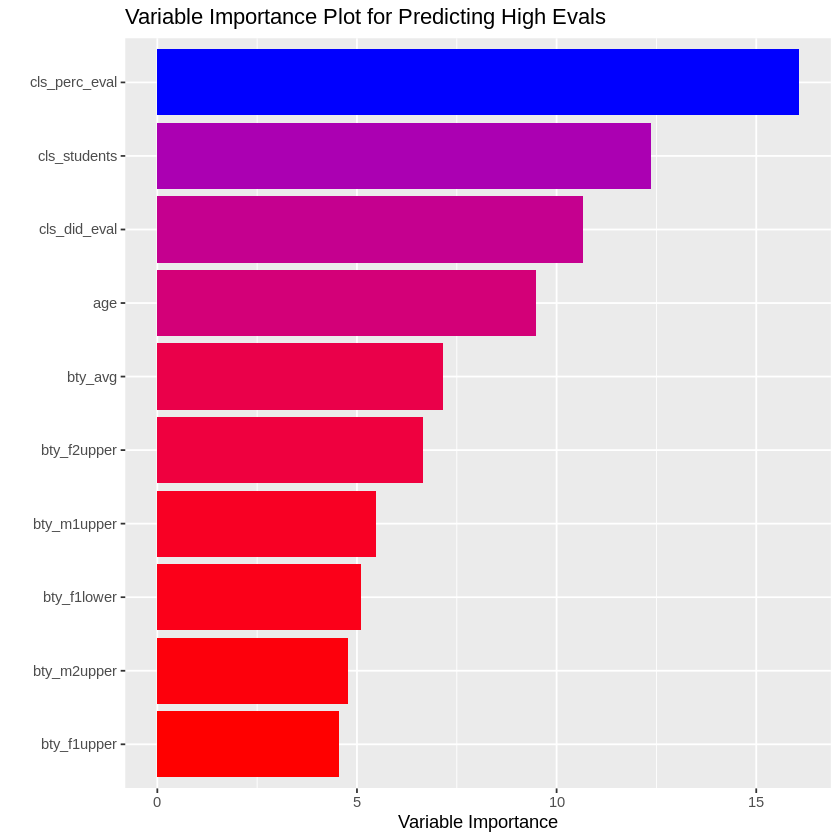

In [26]:
##### YOUR CODE HERE ###################################

varimp = rf.evals.train$variable.importance

# Extract the importance scores
words<-names(varimp)
importance<-as.vector(varimp)

# Create a data frame with both
importance.data = data.frame(words,importance)

# Now we need to reorder the data frame in descending order
importance.data = importance.data[order(-importance),]
# Only look at the ten most important features of the model
importtop10 = importance.data[1:10,]

# Plot variable importance 
ggplot(importtop10, 
       aes(x=reorder(words,importance), y=importance,fill=importance))+ 
  geom_bar(stat="identity", position="dodge")+ coord_flip()+
  ylab("Variable Importance")+
  xlab("")+
  ggtitle("Variable Importance Plot for Predicting High Evals")+
  guides(fill=F)+
  scale_fill_gradient(low="red", high="blue")

ggsave("evalvarimp.png")
##### YOUR CODE HERE ###################################